In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [49]:
movie = pd.read_csv(r'New_Movies.csv',encoding='latin-1')
print('There are', movie.shape[0], 'movies in my data')
movie['Box Office'] = movie['Box Office'].replace("[$,]", "", regex=True).astype('int64')
movie

There are 15 movies in my data


,Movie Title,Runtime,Genre,Award Wins,Award Nominations,Box Office,Director,Plot,DVD
0,Parasite,132,"Drama, Thriller",306,264,53369749,Bong Joon Ho,Greed and class discrimination threaten the ne...,11 Oct 2019
1,Green Book,130,"Biography, Comedy, Drama",58,123,85080171,Peter Farrelly,A working-class Italian-American bouncer becom...,19 Feb 2019
2,The Shape of Water,123,"Drama, Fantasy, Romance",136,350,63859435,Guillermo del Toro,At a top secret research facility in the 1960s...,23 Feb 2018
3,Moonlight,111,Drama,231,300,27854932,Barry Jenkins,A young African-American man grapples with his...,21 Feb 2017
4,Spotlight,129,"Biography, Crime, Drama",124,144,45055776,Tom McCarthy,The true story of how the Boston Globe uncover...,02 Feb 2016
5,Birdman or (The Unexpected Virtue of Ignorance),119,"Comedy, Drama",192,293,42340598,Alejandro G. Iñárritu,A washed-up superhero actor attempts to revive...,01 Aug 2016
6,12 Years a Slave,134,"Biography, Drama, History",242,337,56671993,Steve McQueen,"In the antebellum United States, Solomon North...",31 Aug 2015
7,Argo,120,"Biography, Drama, Thriller",95,156,136025503,Ben Affleck,Acting under the cover of a Hollywood producer...,03 Dec 2013
8,The Artist,100,"Comedy, Drama, Romance",162,204,44671682,Michel Hazanavicius,An egomaniacal film star develops a relationsh...,04 Feb 2014
9,The King's Speech,118,"Biography, Drama, History",108,206,138797449,Tom Hooper,"The story of King George VI, his unexpected as...",01 Apr 2017


### Answer the following questions in your notebook file:
#### 1.(Graph) What was the runtime for each movie?

#### 2. What movie had the longest runtime?
- 'Dances with Wolves' is the longest time run in my data

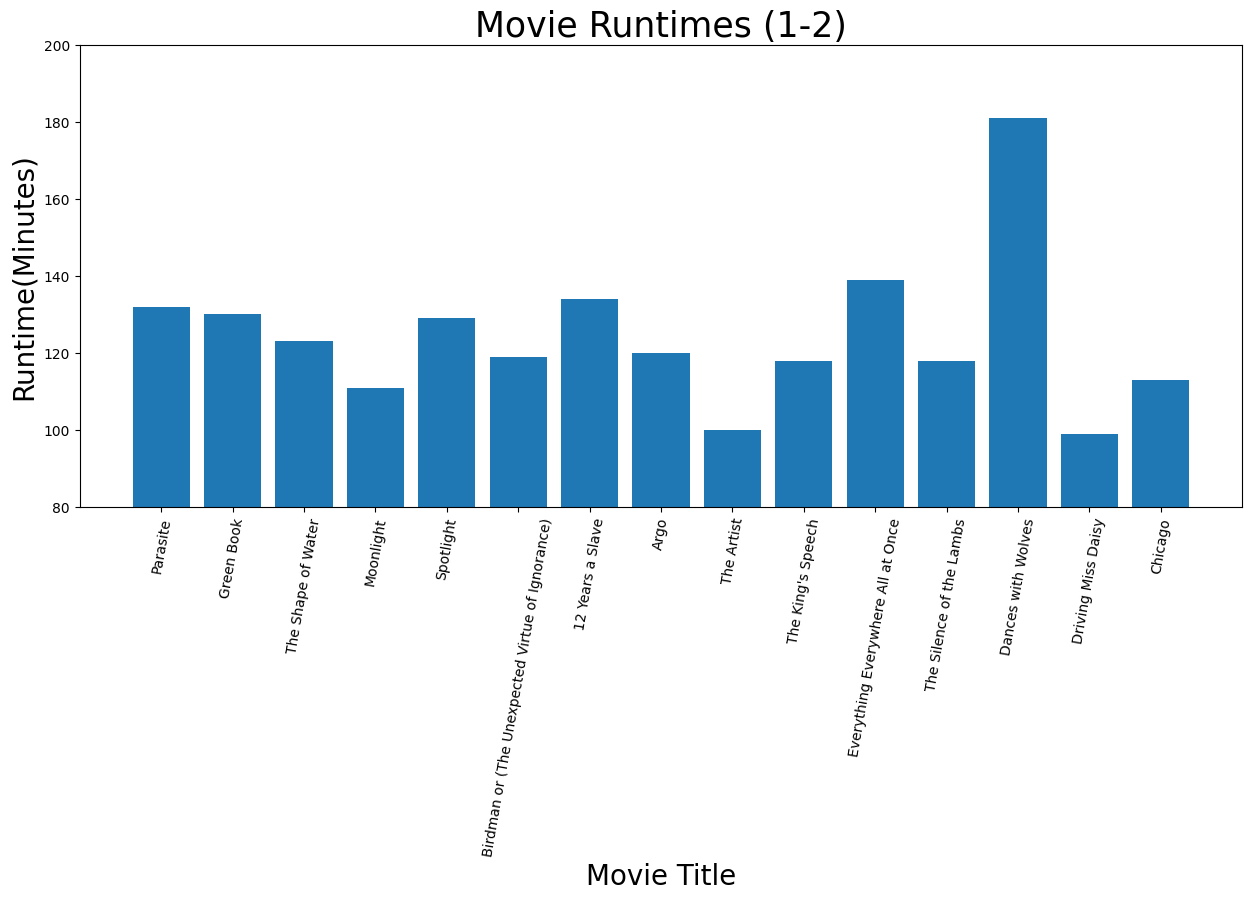

In [4]:

plt.figure(figsize=[15,6])
plt.xticks(rotation=80)
plt.bar(movie['Movie Title'], movie['Runtime'], width=0.8)

plt.title('Movie Runtimes (1-2)', fontsize=25)
plt.xlabel('Movie Title', fontsize=20)
plt.ylabel('Runtime(Minutes)', fontsize=20)
plt.ylim((80,200))

plt.show()

#### 3. Is there any relationship between the length of the movie (runtime) and the number of awards a movie won?
- Answer: as you can see the scatter plot below, There are no relationship between runtime and the number of awards a movie won

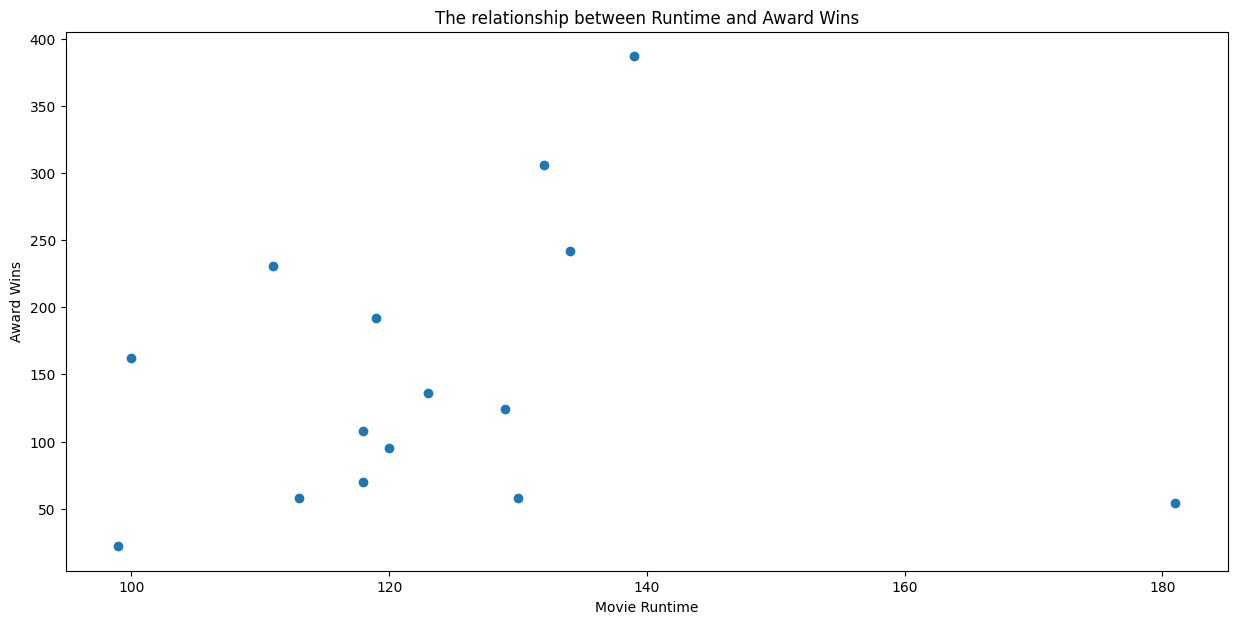

In [5]:
plt.figure(figsize=[15,7])
plt.scatter(movie['Runtime'], movie['Award Wins'])
plt.title('The relationship between Runtime and Award Wins')
plt.xlabel('Movie Runtime')
plt.ylabel('Award Wins')
plt.show()

#### 4. (Graph) How many awards and nominations did each movie receive?

Text(0.5, 1.0, 'Number of Award Wins and Award Nominations Each Movie Won')

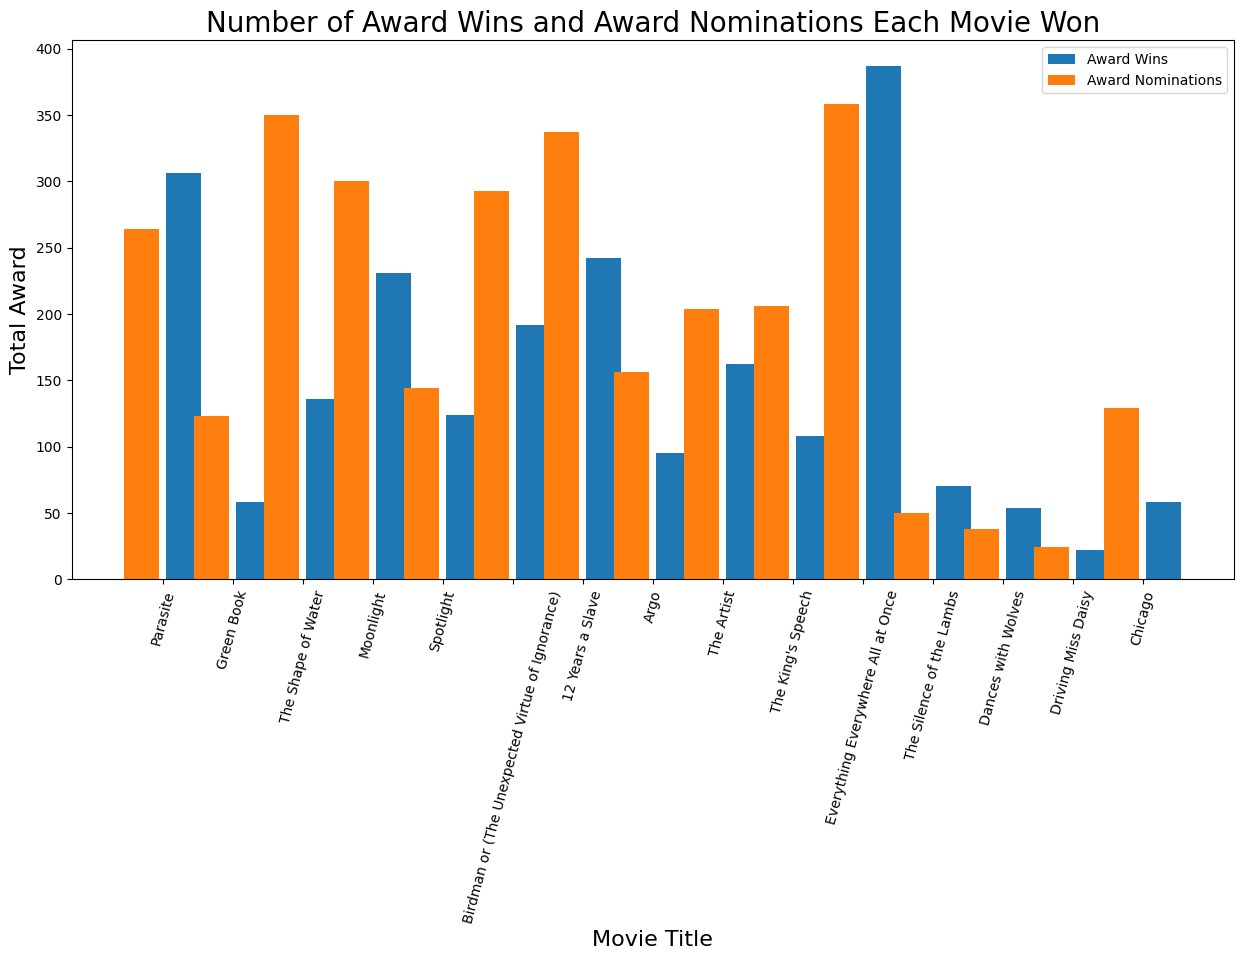

In [7]:
plt.figure(figsize=[15,7])
plt.xticks(rotation=75)

X_axis = np.arange(len(movie['Movie Title']))
plt.bar(X_axis + 0.3, movie['Award Wins'],0.5,label="Award Wins")
plt.bar(X_axis - 0.3, movie['Award Nominations'],0.5,label="Award Nominations")
plt.xticks(X_axis, movie['Movie Title'])
plt.legend()
plt.ylabel('Total Award', fontsize=16)
plt.xlabel('Movie Title', fontsize=16)
plt.title('Number of Award Wins and Award Nominations Each Movie Won', fontsize=20)

- As you can see, 'Everything Everywhere All at Once' have the most award with above 350 award both Award Wins and Award Nominations

### Extra Credit
#### 1.Is there a relationship between the amount of box office earnings a movie had and the amount of total nominations the movie received (total nominations = awards wins + award nominations)?

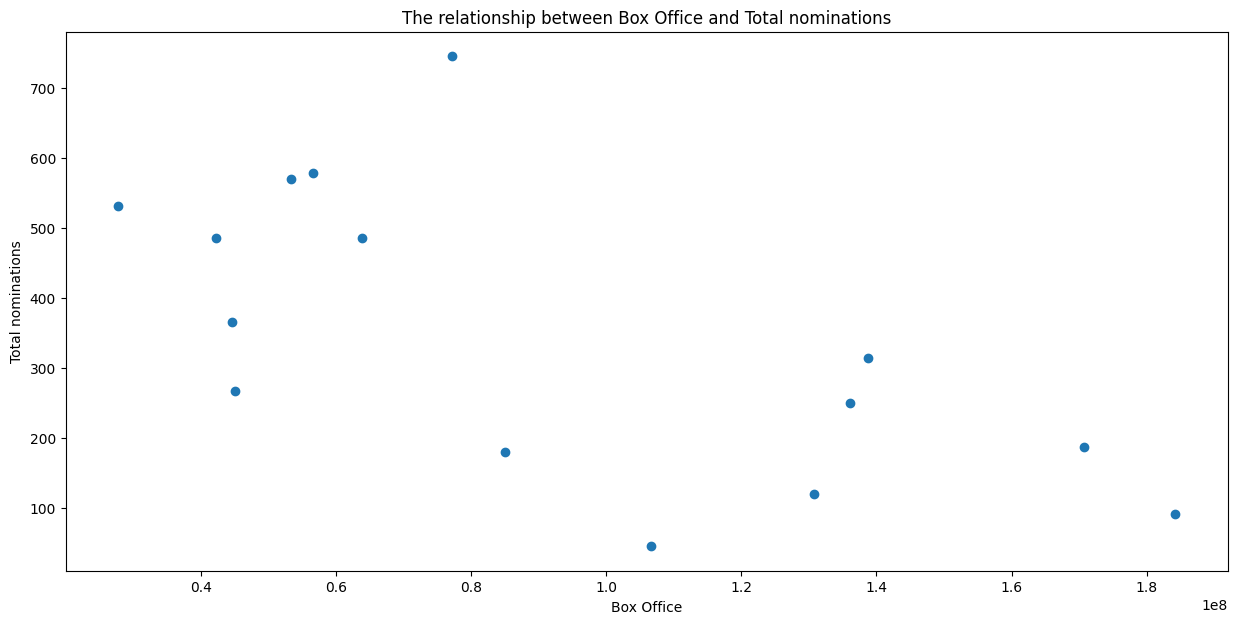

In [42]:
plt.figure(figsize=[15,7])
plt.scatter(movie['Box Office'], movie['Award Wins'] + movie['Award Nominations'])
plt.title('The relationship between Box Office and Total nominations')
plt.xlabel('Box Office')
plt.ylabel('Total nominations')
plt.show()

- you can see the larger Box Office values the smaller Total nominations

#### 2.Is there a relationship between box office earnings and movie runtimes?

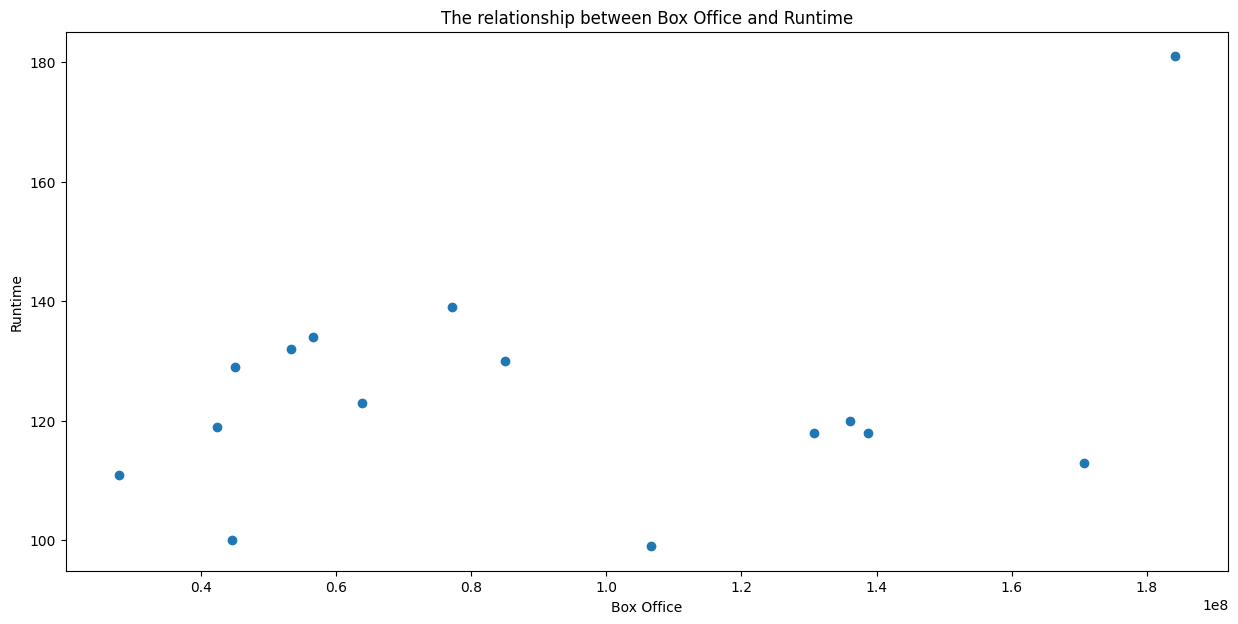

In [43]:
plt.figure(figsize=[15,7])
plt.scatter(movie['Box Office'], movie['Runtime'])
plt.title('The relationship between Box Office and Runtime')
plt.xlabel('Box Office')
plt.ylabel('Runtime')
plt.show()

- You can see there are nearly no relationship between Box Office and Runtime

#### 3.(Graph) How much did each movie earn at the box office?

Text(0, 0.5, 'Box Office Earnings')

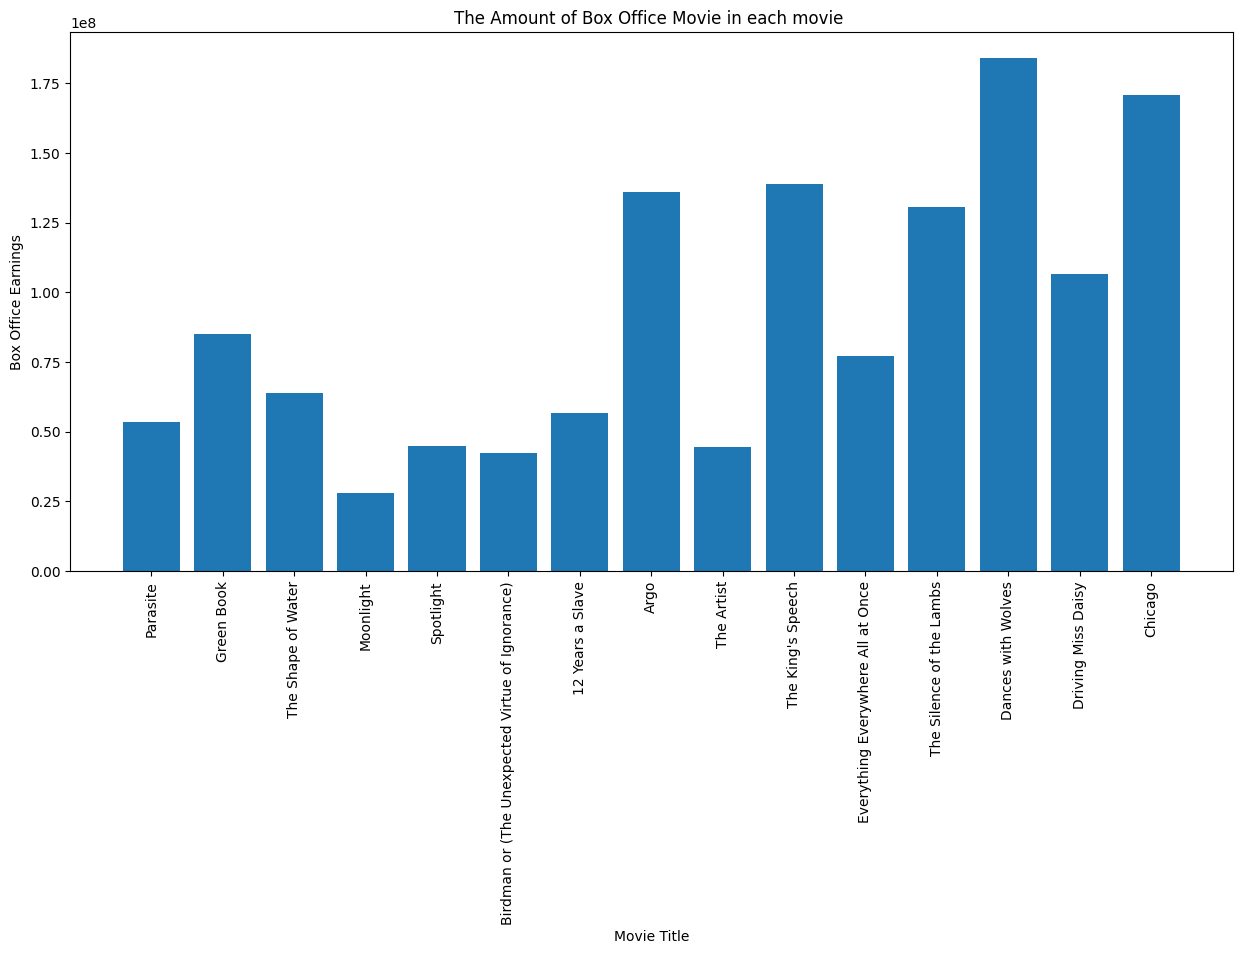

In [46]:
plt.figure(figsize=[15,7])
plt.xticks(rotation=90)
plt.bar(movie['Movie Title'], movie['Box Office'])
plt.title('The Amount of Box Office Movie in each movie ')
plt.xlabel('Movie Title')
plt.ylabel('Box Office Earnings')

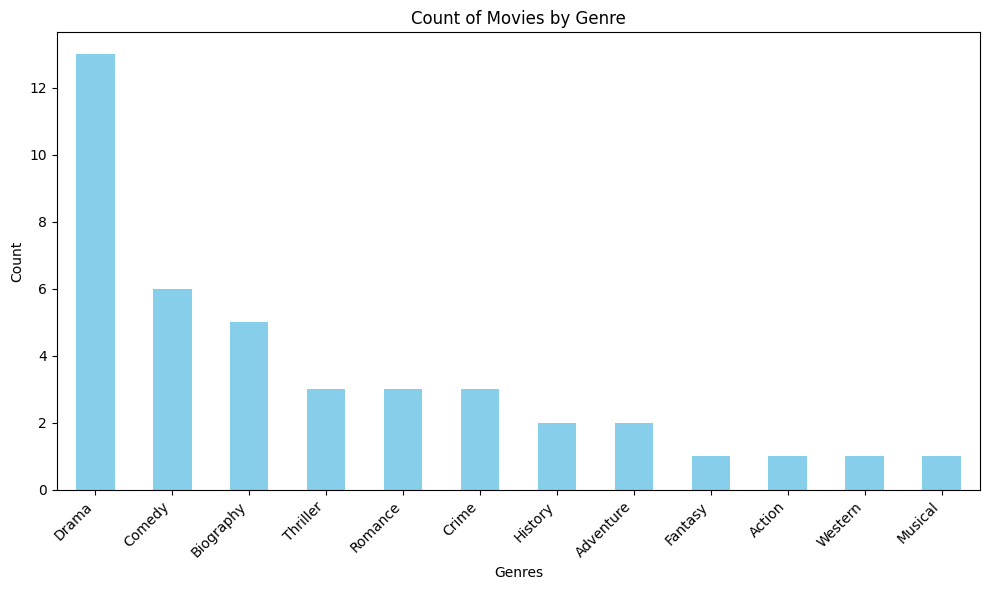

In [55]:
# Split genres and create a list of all genres
all_genres = [genre.strip() for genres in movie['Genre'] for genre in genres.split(',')]

# Count the occurrences of each genre
genre_counts = pd.Series(all_genres).value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar', color='skyblue')
plt.title('Count of Movies by Genre')
plt.xlabel('Genres')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()
plt.show()

- You can see 'Drama' is the highest gener count in my data with above 12